In [1]:
import csidata as cid
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cid.config.setVerbose(True)

setVerbose: True


In [6]:
# recording = '2024-09-25T15-45-38_618832' # 1ms
# recording = '2024-09-25T16-34-44_498593' # 10ms
# recording = '2024-09-25T16-39-01_840852' # 20ms
# recording = '2024-09-25T16-58-31_723389' # 50ms

# recording = '2024-09-25T17-45-53_205814' # 50ms ignore invalid payload
# recording = '2024-09-25T17-51-11_194453' # 1ms ignore invalid payload
# recording = '2024-09-25T17-53-00_915754' # 1ms ignore invalid payload with camera

recording = '2024-09-26T12-45-47_637384' # real time scheduling 1ms
# recording = '2024-10-11T16-53-18-669897_seq-iw' # prod data

In [7]:
with open(f'recordings/sendTimings/{recording}.txt') as f:
# with open(f'record/prod_data/sendTimings/{recording}.txt') as f:
    sendTimings = f.read().splitlines()

print(sendTimings)
    
sendTimings = list(filter(lambda s: s.split()[1].isnumeric() and len(s.split()[1]) == 16, sendTimings))
sendTimings = list(map(lambda s: s.split()[1], sendTimings))
sendTimingsDiff = np.diff(np.array(sendTimings).astype(int))
# sendTimingsDiff
len(sendTimingsDiff)

FileNotFoundError: [Errno 2] No such file or directory: 'recordings/sendTimings/2024-09-26T12-45-47_637384.txt'

In [41]:
recvData = cid.load(f'recordings/csi/{recording}.raw')
recvTimingsDiff = cid.stats.get_intervals(recvData)
# recvTimingsDiff

verbose: True
Detected file format: RAW_OWN
Collected 502 frames in 0.540572 seconds. Sample rate: 928.6459528055466 frames per second


<Axes: >

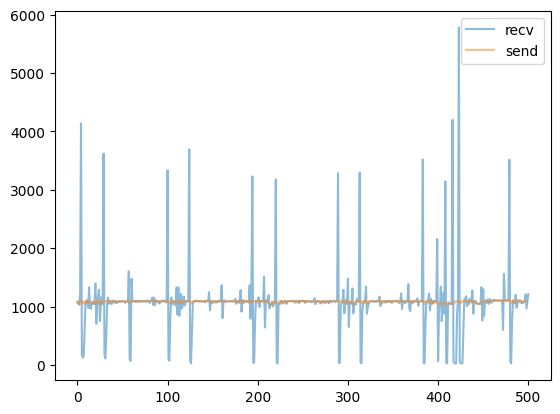

In [42]:
sns.lineplot(data=recvTimingsDiff, alpha=0.5, label='recv')
sns.lineplot(data=sendTimingsDiff, alpha=0.5, label = 'send')

In [37]:
pd.value_counts([s.phyerr for s in recvData.status])

/tmp/ipykernel_162070/2713670560.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts([s.phyerr for s in recvData.status])
/tmp/ipykernel_162070/2713670560.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts([s.phyerr for s in recvData.status])


0    3209
7       2
Name: count, dtype: int64

<Axes: >

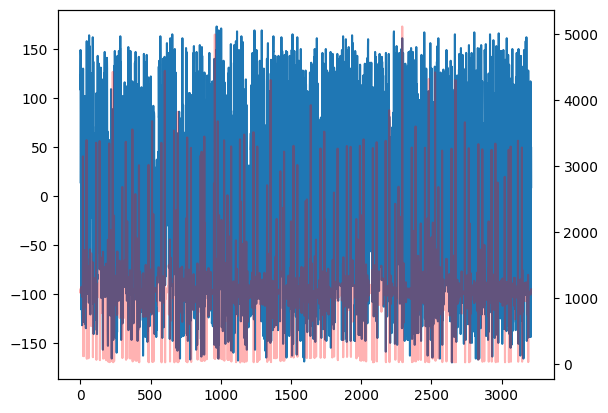

In [38]:
sns.lineplot(recvData.csi[:,0,0,0])
ax2 = plt.twinx()
sns.lineplot(recvTimingsDiff, ax=ax2, color='r', alpha=.3)